## I will try answer a batch of questions, like:

- Have an Provinces the same number of wines? <br>
- Whats the distribuition of Price and Points by Province? <br>
- Whats the country distribuition<br>
- The taster's have the same number of votings? <br>
- What's the distribuition of Points and Prices by taster's name?   <br>
- Taking a look on the word clouds.    <br>

In [1]:
from importlib import import_module
import pandas as pd #Library to handle with dataframes
import matplotlib.pyplot as plt # Library to plot graphics
import numpy as np # To handle with matrices
import seaborn as sns # to build modern graphics
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats
import os
from funtions import *

In [2]:
df = pd.read_csv("./Datasets/wine_clean.csv")

In [6]:
resumetable(df)

Dataset Shape: (200665, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,country,object,0,48,Portugal,US,US,2.77
1,description,object,0,156573,"This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and...","Pineapple rind, lemon pith and orange blossom ...",17.17
2,designation,object,0,44366,Avidagos,Unknown,Reserve Late Harvest,10.63
3,points,int64,0,21,87,87,87,3.69
4,price,float64,0,415,15.0,14.0,13.0,5.77
5,province,object,0,483,Douro,Oregon,Michigan,4.95
6,region_1,object,0,1308,Unknown,Willamette Valley,Lake Michigan Shore,7.16
7,taster_name,object,0,20,Roger Voss,Paul Gregutt,Alexander Peartree,2.51
8,title,object,0,110583,Quinta dos Avidagos 2011 Avidagos Red (Douro),Rainstorm 2013 Pinot Gris (Willamette Valley),St. Julian 2013 Reserve Late Harvest Riesling ...,10.30
9,variety,object,0,739,Portuguese Red,Pinot Gris,Riesling,5.61


In [6]:
print("Statistics of numerical data: ")
print(df.describe())

Statistics of numerical data: 
              points          price
count  200665.000000  200665.000000
mean       88.171545      34.752583
std         3.166040      40.212362
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      25.000000
75%        90.000000      40.000000
max       100.000000    3300.000000


Very interesting distribuition of Points and Price.
- We can see that the values of points are distributed between 80 and 100
- The price have a high difference between the values and a high standard deviation
- In prices, the IQR (Interquantil Range) is 25. The max value is 3300;

We will explore it further later, lets start. 

## Points Distribuition

Saving figure Points_distribuition


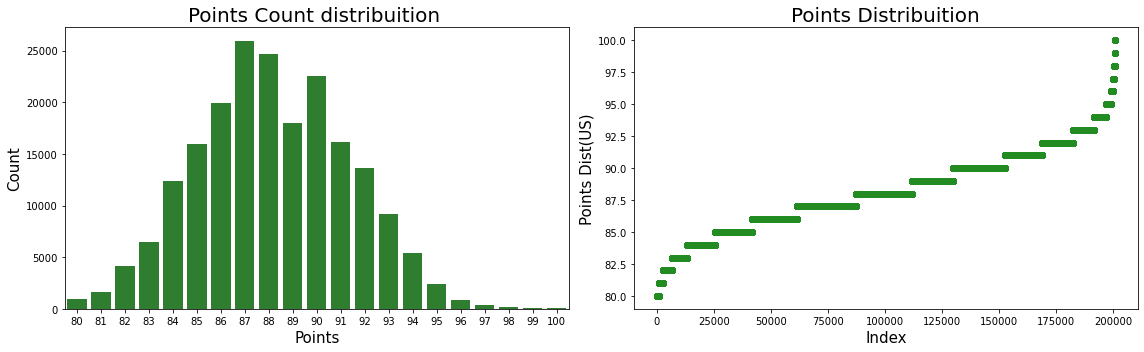

In [8]:

plt.figure(figsize=(16,5))

plt.subplot(1,2,1) 
g = sns.countplot(x='points', data=df, color='forestgreen') 
g.set_title("Points Count distribuition ", fontsize=20) 
g.set_xlabel("Points", fontsize=15) 
g.set_ylabel("Count", fontsize=15) 

plt.subplot(1,2,2)  
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='forestgreen') 
plt.xlabel('Index', fontsize=15)
plt.ylabel('Points Dist(US)', fontsize=15)  
plt.title("Points Distribuition", fontsize=20) 
save_fig("Points_distribuition")
plt.show() 

# Points into categories

In [24]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df["rating_cat"] = df["points"].apply(cat_points)

Saving figure point_cat_count_distribution


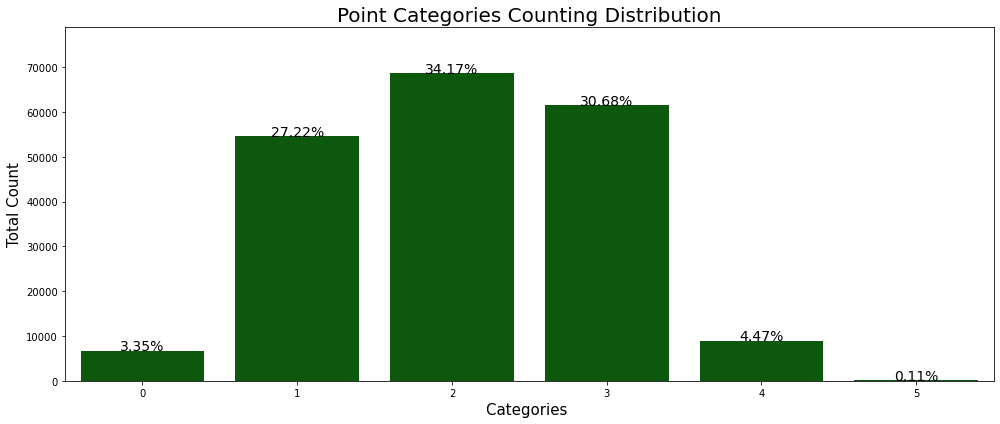

In [25]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

save_fig("point_cat_count_distribution")
plt.show()

In [36]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,rating_cat
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
1,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2


In [38]:
CalcOutliers(df['rating_cat'])

Identified lowest outliers: 0
Identified upper outliers: 218
Identified outliers: 218
Non-outlier observations: 200447
Total percentual of Outliers:  0.1088


## Price Distribuition

c:\Users\xuydo\anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


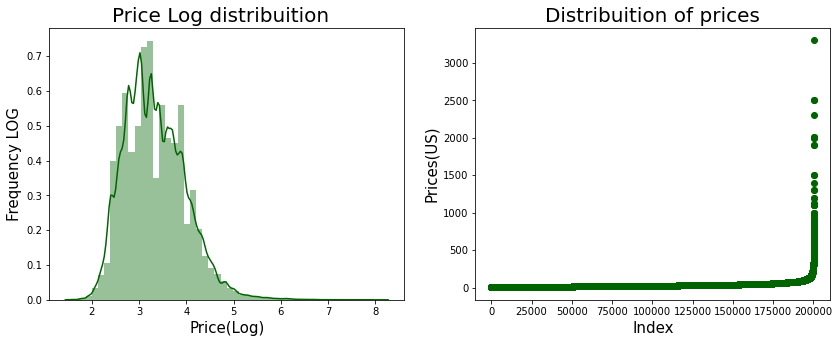

In [15]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df.shape[0]), np.sort(df.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

c:\Users\xuydo\anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


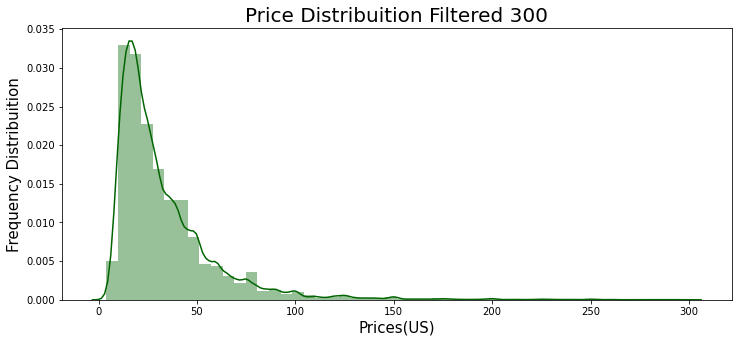

In [16]:
plt.figure(figsize=(12,5))

g = sns.distplot(df[df['price'] < 300]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

In [17]:
# Let's get tehe price_log to better work with this feature
df['price_log'] = np.log(df['price'])

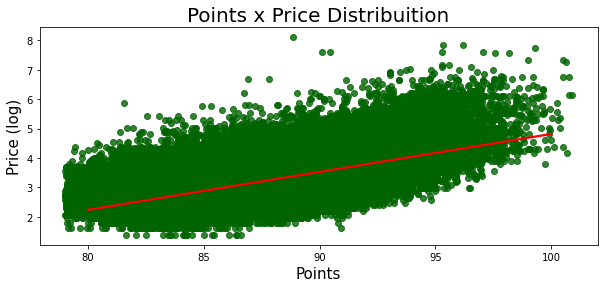

In [19]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

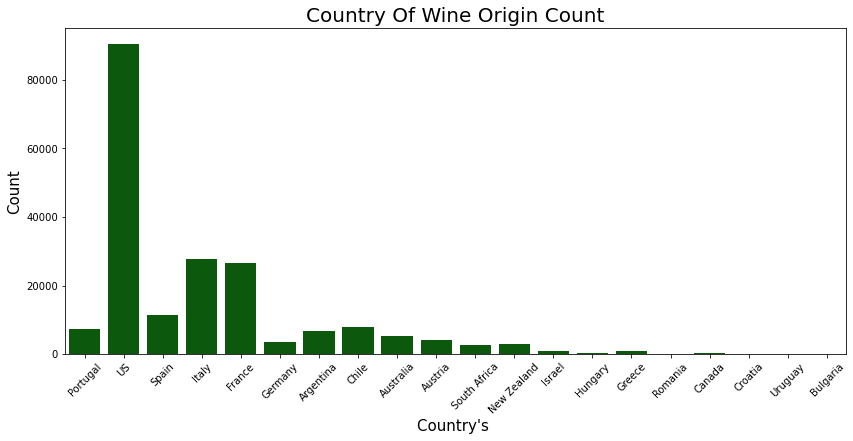

In [21]:
plt.figure(figsize=(14,6))

country = df.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df[df.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

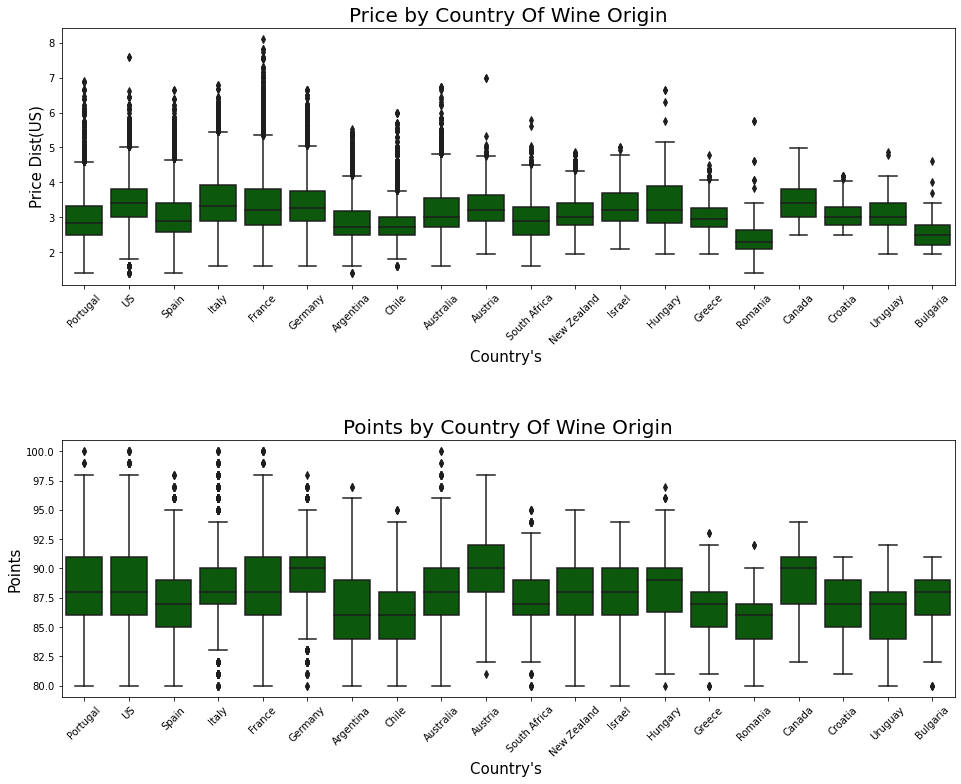

In [22]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

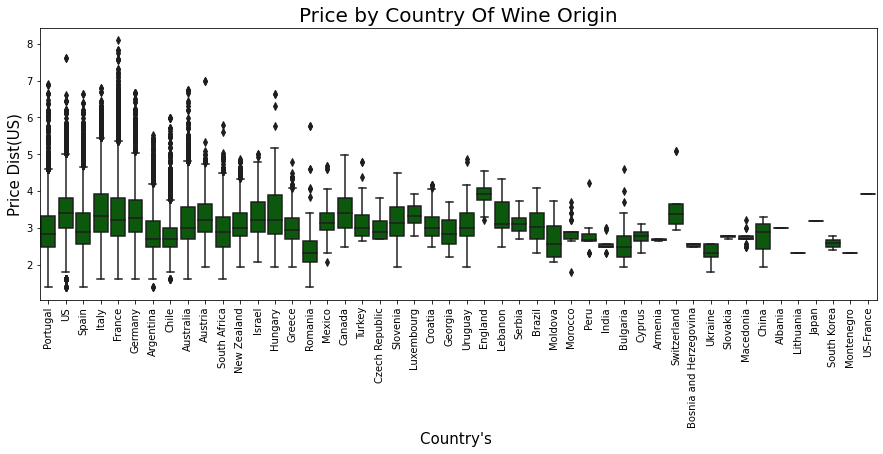

In [23]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen',
                  data=df)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

# Workclouds

In [3]:
import pandas as pd
df = pd.read_csv("./Datasets/wine_clean.csv")

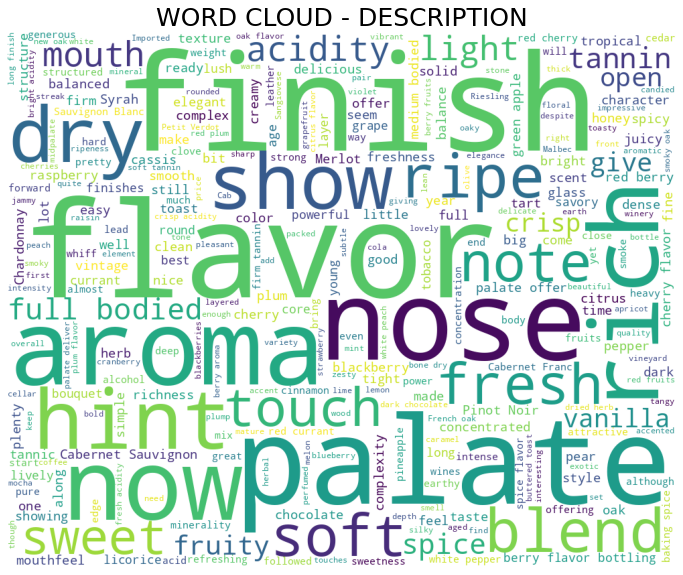

In [17]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ["fruit", "drink", "black", "wine", "drink"]

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()